Saving spam_emails.csv to spam_emails.csv


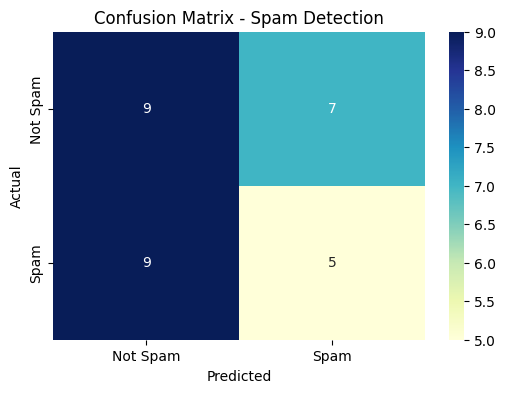


📊 Evaluation Metrics:
Accuracy :  0.47
Precision:  0.42
Recall   :  0.36


In [1]:
# Step 1: Upload CSV file manually
from google.colab import files
uploaded = files.upload()

# Step 2: Read the uploaded file (replace with exact name after upload)
import pandas as pd
file_path = "spam_emails.csv"  # Change this to match your uploaded file
data = pd.read_csv(file_path)

# Step 3: (rest of the code)
# [Insert the full model training + evaluation code here from earlier]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ------------------------------
# STEP 1: Load Your CSV File
# ------------------------------
# Make sure your CSV is in the same directory or provide full path
file_path = "spam_emails.csv"
  # <-- Replace with your actual filename
data = pd.read_csv(file_path)

# ------------------------------
# STEP 2: Preprocessing (if needed)
# ------------------------------
# Check if there are any categorical columns to encode
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Ensure the label column is named 'is_spam' (you can change this below if needed)
label_column = 'is_spam'
X = data.drop(label_column, axis=1)
y = data[label_column]

# ------------------------------
# STEP 3: Split Data
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ------------------------------
# STEP 4: Train the Classifier
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ------------------------------
# STEP 5: Evaluation Metrics
# ------------------------------
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# ------------------------------
# STEP 6: Heatmap
# ------------------------------
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Spam Detection')
plt.show()

# ------------------------------
# STEP 7: Print Evaluation Metrics
# ------------------------------
print(f"\n📊 Evaluation Metrics:")
print(f"Accuracy :  {accuracy:.2f}")
print(f"Precision:  {precision:.2f}")
print(f"Recall   :  {recall:.2f}")